<a href="https://colab.research.google.com/github/SayanthT/CTC-Prediction/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import warnings
warnings.filterwarnings('ignore') #To ignore warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


In [64]:
df=pd.read_excel('/content/drive/MyDrive/ML_project/Data_file.xlsx',skiprows=2)
df.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


**Checking for null values**

In [65]:
df.isna().sum()

S.No.                   0
College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

**Removing column 'S.No'**

In [66]:
df.drop('S.No.',axis=1,inplace=True)

In [67]:
df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


**Violin plot**

It is used to display the distribution of a dataset and to compare multiple distributions.

In a violin plot, the shape of the plot resembles that of a violin or a mirrored density plot, with the thicker sections indicating where the data is more concentrated. 

The plot shows the median (a horizontal line), the  interquartile range (a rectangle), and the range of the data 
(the "whiskers") for each distribution being compared.

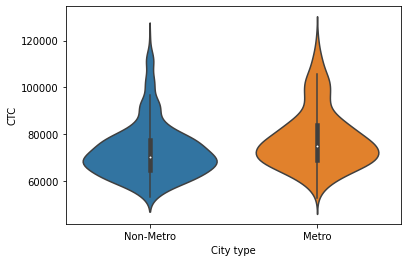

In [68]:
sns.violinplot(x='City type',y='CTC',data=df,size=6)
plt.show()

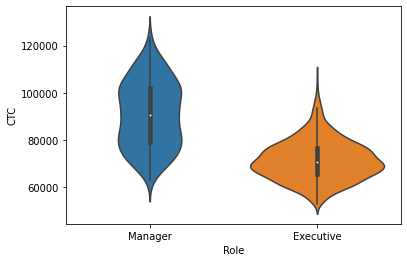

In [69]:
sns.violinplot(x='Role',y='CTC',data=df,size=6)
plt.show()

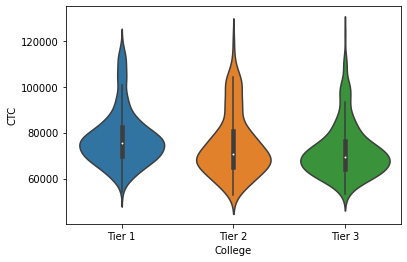

In [70]:
sns.violinplot(x='College',y='CTC',data=df,size=6)
plt.show()

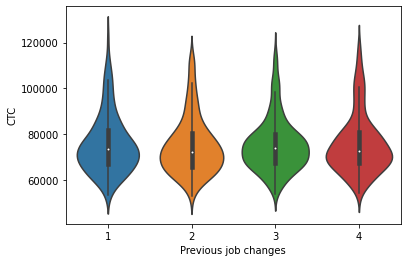

In [71]:
sns.violinplot(x='Previous job changes',y='CTC',data=df,size=6)
plt.show()

**Bar plot**

A bar plot, also known as a bar chart or column chart, is a type of data visualization that uses rectangular bars to represent the values of a categorical variable.

In a bar plot, each category of the variable is represented by a rectangular bar, whose height corresponds to the value or frequency of that category. The bars are usually arranged vertically or horizontally, depending on the orientation of the plot.

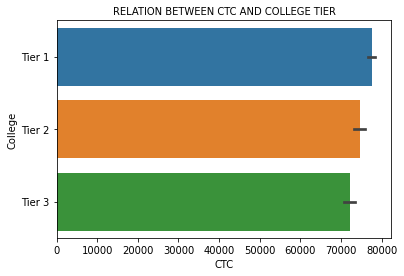

In [72]:
sns.barplot(x='CTC',y='College',data=df)
plt.title('RELATION BETWEEN CTC AND COLLEGE TIER', fontsize = 10)
plt.show()

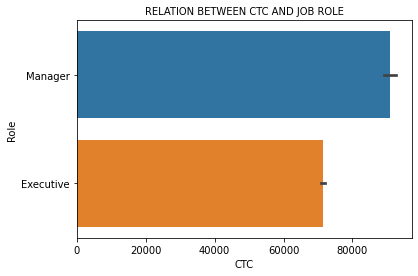

In [73]:
sns.barplot(x='CTC',y='Role',data=df)
plt.title('RELATION BETWEEN CTC AND JOB ROLE', fontsize = 10)
plt.show()

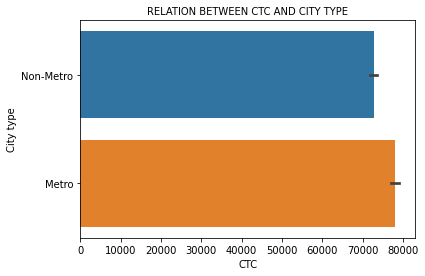

In [74]:
sns.barplot(x='CTC',y='City type',data=df)
plt.title('RELATION BETWEEN CTC AND CITY TYPE', fontsize = 10)
plt.show()

**LABEL ENCODING**

Label encoding is a process of transforming categorical variables into numerical variables so that machine learning algorithms can interpret them. In label encoding, each category of a categorical variable is assigned a unique integer value.

In [75]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['College']=lb.fit_transform(df['College'])
df['Role']=lb.fit_transform(df['Role'])
df['City type']=lb.fit_transform(df['City type'])

**LABEL ENCODED DATASET**

In [76]:
df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,0,1,1,55523,3,66,19,71406.576531
1,1,0,0,57081,1,84,18,68005.870631
2,1,0,0,60347,2,52,28,76764.020277
3,2,0,0,49010,2,81,33,82092.386880
4,2,0,0,57879,4,74,32,73878.097729


**CORRELATION BETWEEN FEATURES**

In [77]:
df.corr()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
College,1.000000,-0.001472,0.002384,-0.016259,-0.050243,-0.024994,-0.006760,-0.179152
Role,-0.001472,1.000000,-0.076185,0.021208,-0.013131,0.014541,-0.025019,0.625435
City type,0.002384,-0.076185,1.000000,-0.036956,0.001568,-0.018550,0.020856,-0.211258
Previous CTC,-0.016259,0.021208,-0.036956,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,-0.050243,-0.013131,0.001568,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,-0.024994,0.014541,-0.018550,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),-0.006760,-0.025019,0.020856,0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,-0.179152,0.625435,-0.211258,0.270260,0.007518,-0.017557,0.301569,1.000000


**HEATMAP REPRESENTATION OF CORRELATION BETWEEN DIFFERENT FEATURES**

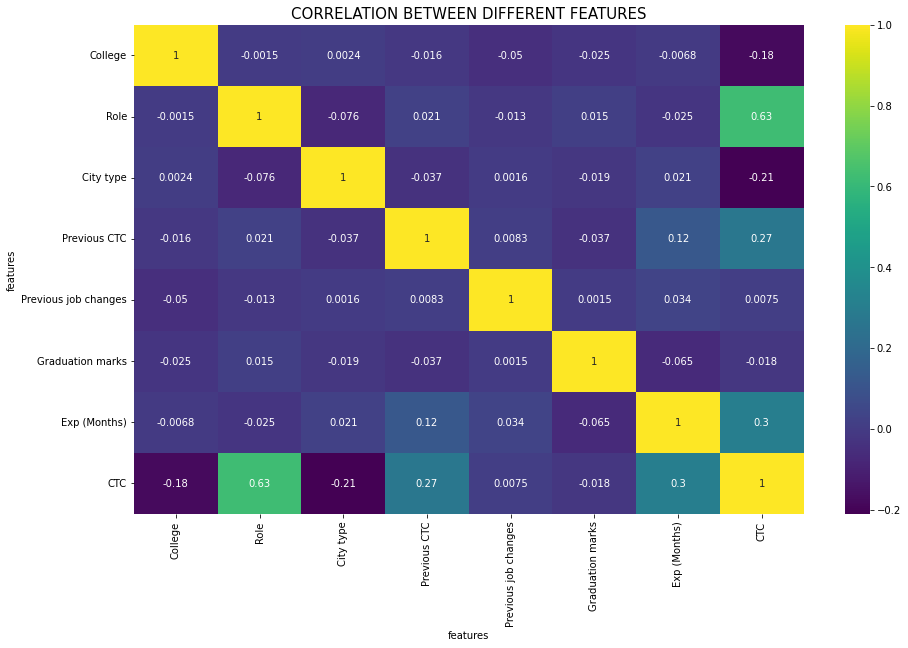

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('CORRELATION BETWEEN DIFFERENT FEATURES', fontsize = 15)
plt.show()

In [79]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Standardize features by removing the mean and scaling to unit variance using StandardScaler**

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

**SPLITTING TRAIN AND TEST DATA**

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1,random_state=0)

**Initializing lists fostoring model names and corresponding r2_score**

In [82]:
Models=[]
r2_scores=[]

LIST OF ALGORITHMS IMPLEMENTED



*  RandomForestRegressor
*  AdaBoostRegressor
*  LinearRegression
*  GradientBoostingRegressor
*  LGBMRegressor









**RandomForestRegressor Algorithm**

In [83]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,Y_train)
y_pred1=model1.predict(X_test)
r2s=r2_score(Y_test,y_pred1)
r2_scores.append(r2s)
Models.append('RandomForestRegressor')
print('r2_score of RandomForestRegressor :',r2s)

r2_score of RandomForestRegressor : 0.7611159630445732


**Sample prediction**

In [84]:
model1.predict(sc.transform([[0,1,1,55523,3,66,19]]))

array([77307.82617712])

**AdaBoostRegressor Algorithm**

In [85]:
from sklearn.ensemble import AdaBoostRegressor
model2=AdaBoostRegressor()
model2.fit(X_train,Y_train)
y_pred2=model2.predict(X_test)
r2s=r2_score(Y_test,y_pred2)
r2_scores.append(r2s)
Models.append('AdaBoostRegressor')
print('r2_score of AdaBoostRegressor :',r2s)

r2_score of AdaBoostRegressor : 0.7097858032485216


**Sample prediction**

In [86]:
model2.predict(sc.transform([[0,1,1,55523,3,66,19]]))

array([89241.92839441])

**LinearRegression Algorithm**

In [87]:
from sklearn.linear_model import LinearRegression
model3=LinearRegression()
model3.fit(X_train,Y_train)
y_pred3=model3.predict(X_test)
r2s=r2_score(Y_test,y_pred3)
r2_scores.append(r2s)
Models.append('LinearRegression')
print('r2_score of LinearRegressor :',r2s)

r2_score of LinearRegressor : 0.7207540276289827


**Sample prediction**

In [88]:
model3.predict(sc.transform([[0,1,1,55523,3,66,19]]))

array([85035.80326845])

**GradientBoostingRegressor Algorithm**

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor()
model4.fit(X_train,Y_train)
y_pred4=model4.predict(X_test)
r2s=r2_score(Y_test,y_pred4)
r2_scores.append(r2s)
Models.append('GradientBoostingRegressor')
print('r2_score of GradientBoostingRegressor :',r2s)

r2_score of GradientBoostingRegressor : 0.7742820430262349


**Sample prediction**

In [90]:
model4.predict(sc.transform([[0,1,1,55523,3,66,19]]))

array([86899.83070163])

**LGBMRegressor Algorithm**

In [91]:
from lightgbm import LGBMRegressor
model5=LGBMRegressor()
model5.fit(X_train,Y_train)
y_pred5=model5.predict(X_test)
r2s=r2_score(Y_test,y_pred5)
r2_scores.append(r2s)
Models.append('LGBMRegressor')
print('r2_score LGBMRegressor :',r2s)

r2_score LGBMRegressor : 0.7757972469628748


**Sample prediction**

In [92]:
model5.predict(sc.transform([[0,1,1,55523,3,66,19]]))

array([81235.71130042])

**R2_SCORE COMPARISON**

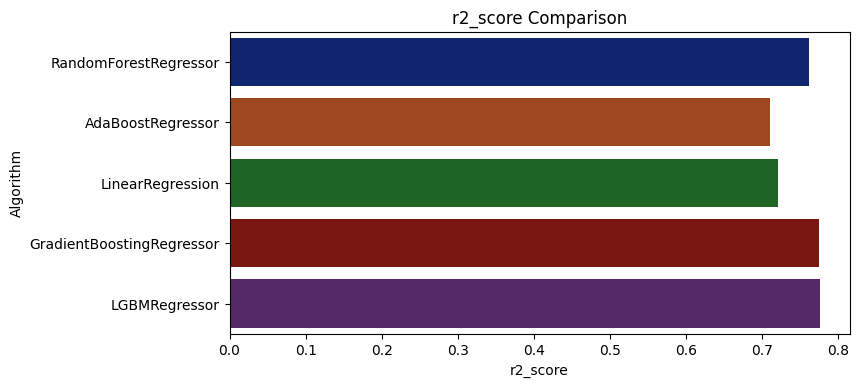

In [93]:
plt.figure(figsize=[8,4],dpi=100)
plt.title('r2_score Comparison')
plt.xlabel('r2_score')
plt.ylabel('Algorithm')
sns.barplot(x=r2_scores,y=Models,palette='dark')
plt.show()